# Outlier detection using IQR method

The Interqurtile Range (IQR) is a measure of statistical dispersion, being equal to the difference between the first quartiles and the third quartile. The first quartile, denoted as Q1 is the value in the data set that holds 25% of the values below it. The third quartile, denoted Q3, is the value in the data set that holds 25% of the values above it. 

Therefore, the IQR method can be used to identify outliers by defining limits on the sample values that are a factor c of the IQR below the 25th percentile or above the 75th percentile. The default value for the factor c is 1.5, but it can be increased to identify just values that are extreme outliers.


                 LB          Q1      Q3          UB      
      outlier                +−−−−−+−+                  outlier
         *       |−−−−−−−−−−−|     | |−−−−−−−−−−−|         *
                             +−−−−−+−+    
                    
 +−−−+−−−+−−−+−−−+−−−+−−−+−−−+−−−+−−−+−−−+−−−+−−−+−−−+−−−+−−−+−−−+

In [1]:
import sys, os, pprint, copy
sys.path.append(os.path.abspath('../'))
import ptp.reader, ptp.metrics
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import ptp.outlier
%matplotlib inline
%load_ext autoreload
%autoreload 2

Dataset info:
Filename: ../data/serial-20190822-173422.json
{'fh_traffic': {'bitrate': {'dl': 837120000.0, 'ul': 418560000.0},
                'fs': 7680000.0,
                'iq_size': 24,
                'n_rru_active': 1,
                'n_rru_cfg': 1,
                'n_spf': 64,
                'type': 'inline'},
 'hops': 4,
 'oscillator': 'ocxo',
 'start_time': '2019-08-22 17:34:21',
 'sync_period': 0.015625}


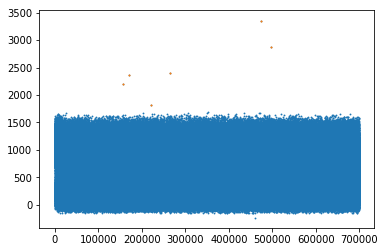

---------------------------------------------------------------

Dataset info:
Filename: ../data/serial-20190813-185308.json
{'fh_traffic': {'bitrate': {'dl': 837120000.0, 'ul': 418560000.0},
                'fs': 7680000.0,
                'iq_size': 24,
                'n_rru_active': 1,
                'n_rru_cfg': 1,
                'n_spf': 64,
                'type': 'inline'},
 'hops': 4,
 'oscillator': 'xo',
 'start_time': '2019-08-13 18:53:08',
 'sync_period': 0.25}


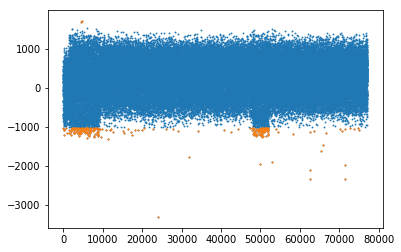

---------------------------------------------------------------

Dataset info:
Filename: ../data/serial-20190820-103355.json
{'fh_traffic': None,
 'hops': 4,
 'oscillator': 'xo',
 'start_time': '2019-08-20 10:33:55',
 'sync_period': 0.25}


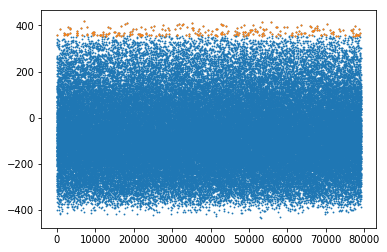

---------------------------------------------------------------

Dataset info:
Filename: ../data/serial-20190821-223131.json
{'fh_traffic': {'bitrate': {'dl': 837120000.0, 'ul': 418560000.0},
                'fs': 7680000.0,
                'iq_size': 24,
                'n_rru_active': 1,
                'n_rru_cfg': 1,
                'n_spf': 64,
                'type': 'inline'},
 'hops': 4,
 'oscillator': 'ocxo',
 'start_time': '2019-08-21 22:31:31',
 'sync_period': 0.25}


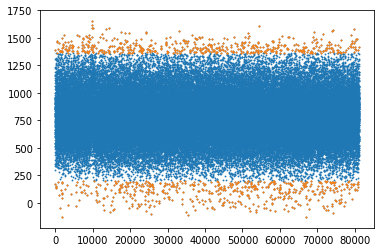

---------------------------------------------------------------

Dataset info:
Filename: ../data/serial-20200116-215655.json
{'fh_traffic': {'bitrate': {'dl': 837120000.0, 'ul': 837120000.0},
                'fs': 7680000.0,
                'iq_size': 24,
                'n_rru_dl': 2,
                'n_rru_ul': 2,
                'n_spf': 64,
                'type': 'inline'},
 'hops': 4,
 'n_rru_ptp': 2,
 'oscillator': 'ocxo',
 'start_time': '2020-01-16 21:56:55',
 'sync_period': 0.25}


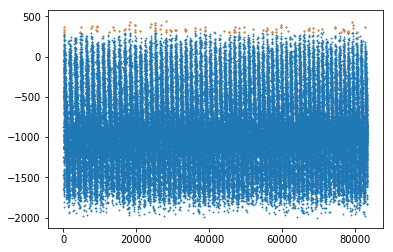

---------------------------------------------------------------

Dataset info:
Filename: ../data/serial-20200117-081236.json
{'fh_traffic': {'bitrate': {'dl': 837120000.0, 'ul': 837120000.0},
                'fs': 7680000.0,
                'iq_size': 24,
                'n_rru_dl': 2,
                'n_rru_ul': 2,
                'n_spf': 64,
                'type': 'inline'},
 'hops': 4,
 'n_rru_ptp': 2,
 'oscillator': 'xo',
 'start_time': '2020-01-17 08:12:35',
 'sync_period': 0.25}


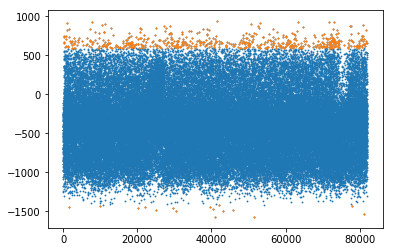

---------------------------------------------------------------



In [2]:
filenames = ["../data/serial-20190822-173422.json",
             "../data/serial-20190813-185308.json",
             "../data/serial-20190820-103355.json",
             "../data/serial-20190821-223131.json",
             "../data/serial-20200116-215655.json",
             "../data/serial-20200117-081236.json"]

for filename in filenames:
    # Reader
    reader = ptp.reader.Reader(filename)
    reader.run()
    print("Dataset info:")
    print(f"Filename: {filename}")
    pprint.pprint(reader.metadata)
    
    # Outlier detection
    outlier = ptp.outlier.Outlier(reader.data)
    outlier.process(c=2)
    
    d_asym     = np.array([r['asym'] for r in reader.data])
    x          = np.array([r['idx'] for r in reader.data])
    d_asym_out = [r['asym'] for r in reader.data if 'outlier' in r]
    x_out      = [r['idx'] for r in reader.data if 'outlier' in r]
    
    plt.figure()
    plt.scatter(x, d_asym, s=0.7)
    plt.scatter(x_out, d_asym_out, s=1)
    plt.show()
    plt.close()
    
    print("---------------------------------------------------------------\n")